In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [2]:
df = pd.read_csv("D:/laptop.csv")
df

,Unnamed: 0,_id,Processor (CPU),Graphics card (GPU),Memory (RAM),Screen size,Screen resolution,Weight,Hard drives,Size (length x width x height),...,Release date,Amazon.com Lowest New Price,Name,CPU Score,GPU Score,Game,Van Phong,Do Hoa,Lap Trinh,Doanh Nhan
0,0,6589cba38997406b55ed5eab,Intel Core i7-12700H,GeForce RTX 3070 Ti,64,17.3,Full HD(1920 x 1080 pixels),2.72,4000,320,...,18-Apr-23,112296000,Gigabyte AORUS 17 XE4,15486,23757,0,0,1,0,0
1,1,6589cba38997406b55ed5eac,Intel Core i5-1135G7,Intel Iris Xe,12,15.6,Full HD(1920 x 1080 pixels),1.7,250,111.005544,...,25-Feb-22,13319760,Lenovo IdeaPad 3 15″ (IdeaPad),5002,2690,0,0,0,0,1
2,2,6589cba38997406b55ed5eaf,Intel Core i7-12700H,GeForce RTX 3070 Ti,64,16,WQUXGA(3840 x 2400 pixels),2.27,2000,120.661728,...,18-Apr-23,56736000,Gigabyte AERO 16,15486,23757,0,0,1,0,0
3,3,6589cba38997406b55ed5eb0,Intel Core i5-10300H,GeForce GTX 1650,16,15.6,Full HD(1920 x 1080 pixels),2.3,500,0biet,...,8-Mar-22,19896000,ASUS TUF F15 144Hz,4666,7869,1,0,0,0,0
4,4,6589cba38997406b55ed5eb2,Intel Core i7-12650H,GeForce RTX 3050,16,15.6,Full HD(1920 x 1080 pixels),1.86,1000,119.984895,...,18-Nov-23,23496000,EXcaliberPC MSI 15″ (Thin),13152,12960,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12862,12862,6589d14e8997406b55eda5e6,Intel Core i5-1135G7,0biet,16,14,HD(1366 x 768 pixels),1.46,1000,79.13752,...,8-Sep-23,16776000,HP 14T,5002,0,0,1,0,1,0
12863,12863,6589d14f8997406b55eda5eb,AMD Ryzen 7 PRO 5850U,0biet,16,14,Full HD(1920 x 1080 pixels),0biet,1000,78.445962,...,8-Feb-22,26399760,Lenovo ThinkPad T 14″ (1),10097,0,0,0,0,0,0
12864,12864,6589d14f8997406b55eda5f2,Intel Celeron N3350,0biet,4,14,Full HD(1920 x 1080 pixels),0biet,32,0biet,...,7-Aug-20,8825760,Acer Chromebook 514,173,0,0,0,0,0,0
12865,12865,6589d1508997406b55eda5f4,AMD Ryzen 5 7530U,0biet,16,16,Full HD Plus(2160 x 1440 pixels),1.7,500,100.48941,...,2-Aug-20,19199520,Lenovo ThinkPad E16 (ThinkPad E15),8517,0,0,1,0,1,0


Game          2891
Van Phong     2444
Do Hoa        3107
Lap Trinh     1964
Doanh Nhan     187
dtype: int64


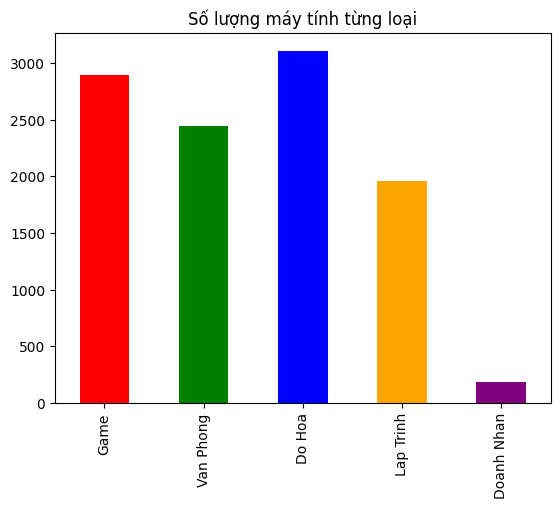

In [3]:
col_show = ["Game", "Van Phong", "Do Hoa", "Lap Trinh", "Doanh Nhan"]
count_ones = df[col_show].eq(1).sum()
print(count_ones)

# List of colors for each category
colors = ['red', 'green', 'blue', 'orange', 'purple']

count_ones.plot(kind='bar', color=colors)
plt.title('Số lượng máy tính từng loại')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

In [4]:
def is_float(value):
    try:
        float_value = float(value)
        return True
    except ValueError:
        return False

Function

In [5]:
def RamDistribution(nameType, thressHold):
    # Get the counts of each unique value in the specified column
    value_counts = df[df[nameType] != 0]["Memory (RAM)"].value_counts()

    # Plot a pie chart

    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['1'] = value_counts[value_counts < thressHold].sum()

    combined_counts.index = combined_counts.index.astype(int)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    ax = combined_counts_percent.plot(kind='bar', color='b')

    plt.title(f'Tỉ lệ Ram trong ' + nameType)
    plt.xlabel('Dung lượng Ram')
    plt.ylabel('Percent(%)')

    new_labels = list(combined_counts_percent.index)
    new_labels[0] = 'Other'  # Replace 'New Label' with your desired label for the first tick
    ax.set_xticklabels(new_labels)

    plt.show()

In [6]:
def ScreenSizeDistribution(nameType, thressHold):
    value_counts = df[df[nameType] != 0]["Screen size"].value_counts()
    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['1'] = value_counts[value_counts < thressHold].sum()

    combined_counts.index = combined_counts.index.astype(float)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    ax = combined_counts_percent.plot(kind='bar', color='b')

    plt.title(f'Tỉ lệ Ram')
    plt.xlabel('Dung lượng Ram')
    plt.ylabel('Percent(%)')

    new_labels = list(combined_counts_percent.index)
    new_labels[0] = 'Other'  # Replace 'New Label' with your desired label for the first tick
    ax.set_xticklabels(new_labels)

    plt.show()

In [7]:
def HardDriveDistribution(nameType, thressHold):
    value_counts = df[df[nameType] != 0]["Hard drives"].value_counts()

    # Plot a pie chart

    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['-1'] = value_counts[value_counts < thressHold].sum()

    combined_counts.index = combined_counts.index.astype(int)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    ax = combined_counts_percent.plot(kind='bar', color='b')

    plt.title(f'Tỉ lệ Phần cứng của ' + nameType)
    plt.xlabel('Dung lượng Phần Cứng')
    plt.ylabel('Percent(%)')

    new_labels = list(combined_counts_percent.index)
    new_labels[0] = 'Other'  # Replace 'New Label' with your desired label for the first tick
    ax.set_xticklabels(new_labels)

    plt.show()

In [8]:
def CPUDistribution(nameType, thressHold):
    value_counts = df[df[nameType] != 0]['Processor (CPU)'].value_counts()

    # Plot a pie chart

    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['Other'] = value_counts[value_counts < thressHold].sum()

    # combined_counts.index = combined_counts.index.astype(str)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    combined_counts_percent.plot(kind='bar', color='b')
    plt.title(f'Tỉ lệ CPU trong ' + nameType)
    plt.xlabel('Loại CPU')
    plt.ylabel('Số lượng')
    plt.show()

In [40]:
def GPUDistribution(nameType, thressHold):
    value_counts = df[df[nameType] != 0]["Graphics card (GPU)"].value_counts()

    # Plot a pie chart

    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['Other'] = value_counts[value_counts < thressHold].sum()

    combined_counts.index = combined_counts.index.astype(str)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    # combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    combined_counts_percent.plot(kind='bar', color='b')
    plt.title(f'Tỉ lệ GPU trong ' + nameType)
    plt.xlabel('Loại GPU')
    plt.ylabel('Percent(%)')
    plt.show()

In [10]:
def AveragePrice(nameType):
    df_copy = df.copy()

    # Drop rows where "Amazon.com Lowest New Price" is "0biet"
    df_copy.drop(df_copy[df_copy["Amazon.com Lowest New Price"] == "0biet"].index, inplace=True)

    # Convert the column to numeric (assuming it's a numeric column)
    df_copy["Amazon.com Lowest New Price"] = pd.to_numeric(df_copy["Amazon.com Lowest New Price"], errors="coerce")

    # Filter out rows where the specified column (nameType) is not zero
    df_filtered = df_copy[df_copy[nameType] != 0]

    # Calculate the mean of the "Amazon.com Lowest New Price" column for the filtered rows
    mean_value = df_filtered["Amazon.com Lowest New Price"].mean()

    return mean_value


In [11]:
AveragePrice("Doanh Nhan")

42097516.962566845

In [12]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
test_df = test_df.drop(0)

In [13]:
pd.concat([train_df, test_df])
train_df

,Unnamed: 0,_id,Memory (RAM),Screen size,Weight,Hard drives,Size (length x width x height),Price,CPU Score,GPU Score,Game,Van Phong,Do Hoa,Lap Trinh,Doanh Nhan
0,1,6589cba38997406b55ed5eac,12,15.6,1.70,250,111.005544,13319760.0,5002,2690,0,0,0,0,1
1,4,6589cba38997406b55ed5eb2,16,15.6,1.86,1000,119.984895,23496000.0,13152,12960,0,0,0,1,0
2,5,6589cba38997406b55ed5eae,64,17.3,1.51,2000,124.988760,27119760.0,8018,2690,0,0,0,0,1
3,6,6589cba38997406b55ed5eb5,16,15.6,2.10,1000,111.462000,35880000.0,7213,14126,0,0,0,1,0
4,8,6589cba58997406b55ed5eba,16,14.0,1.30,1000,78.200010,26399760.0,7915,2690,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,12004,6589cfe98997406b55ed944b,16,15.6,1.70,1000,95.404830,10317360.0,3056,0,0,1,0,0,0
5666,12005,6589cfea8997406b55ed944c,16,16.0,1.81,0,100.489410,17135520.0,8517,0,0,1,0,1,0
5667,12007,6589cfea8997406b55ed9454,16,15.6,1.63,500,97.888125,11280000.0,8517,0,0,1,1,1,0
5668,12008,6589cfeb8997406b55ed945b,20,14.0,1.37,1000,76.339200,11496000.0,5247,0,0,1,0,1,0


In [14]:
o_df = pd.read_csv('data/0.csv')
drop_df = o_df.drop(train_df.columns.to_list(), axis=1)
o_df = o_df.drop(drop_df.columns.to_list(), axis=1)
o_df

,Unnamed: 0,_id,Memory (RAM),Screen size,Weight,Hard drives,Size (length x width x height),Price,CPU Score,GPU Score,Game,Van Phong,Do Hoa,Lap Trinh,Doanh Nhan
0,9,6589cba58997406b55ed5ebc,16,15.6,2.45,500,159.468520,19176000.0,9513,7041,0,0,0,0,0
1,13,6589cba68997406b55ed5ec3,24,14.0,1.65,1000,78.065680,44856000.0,14059,14902,0,0,0,0,0
2,16,6589cba68997406b55ed5ec8,32,17.3,2.72,2000,128.000000,47016000.0,5125,2690,0,0,0,0,0
3,17,6589cba68997406b55ed5ec9,16,14.1,1.81,500,NaN,9576000.0,5002,2690,0,0,0,0,0
4,19,6589cba68997406b55ed5ecd,16,15.6,2.40,500,134.594652,20376000.0,5736,7869,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,12854,6589d14b8997406b55eda5c2,4,14.0,1.40,120,76.398840,5424000.0,1456,0,0,0,0,0,0
5977,12857,6589d14c8997406b55eda5cc,4,15.6,1.66,250,95.550000,7199760.0,3057,0,0,0,0,0,0
5978,12861,6589d14e8997406b55eda5e0,16,13.0,NaN,250,334.310800,40536000.0,8090,0,0,0,0,0,0
5979,12863,6589d14f8997406b55eda5eb,16,14.0,NaN,1000,78.445962,26399760.0,10097,0,0,0,0,0,0


In [15]:
def is_float(value):
    try:
        float_value = float(value)
        return True
    except ValueError:
        return False

In [87]:
o_df = o_df[pd.to_numeric(o_df['Price'], errors='coerce').notna()]
pd.concat([train_df, o_df])
train_df
new = train_df

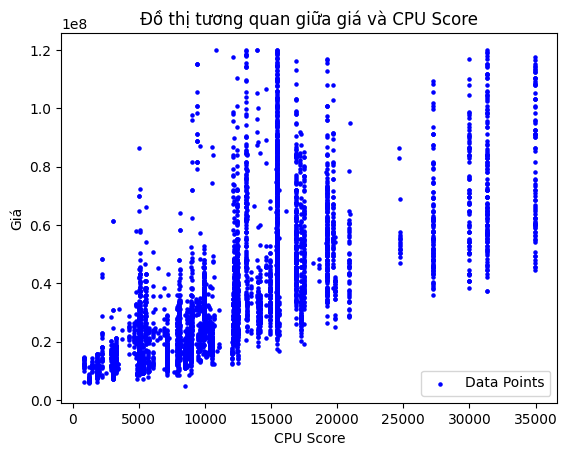

In [17]:
# Assuming df is your DataFrame
col1 = train_df['CPU Score']  # Replace 'Column1' with the actual name of your first column
col2 = train_df['Price']  # Replace 'Column2' with the actual name of your second column

# Plot scatter plot
plt.scatter(col1, col2, marker='o', color='blue', label='Data Points', s = 5)

# Add labels and title
plt.xlabel('CPU Score')
plt.ylabel('Giá')
plt.title('Đồ thị tương quan giữa giá và CPU Score')

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()

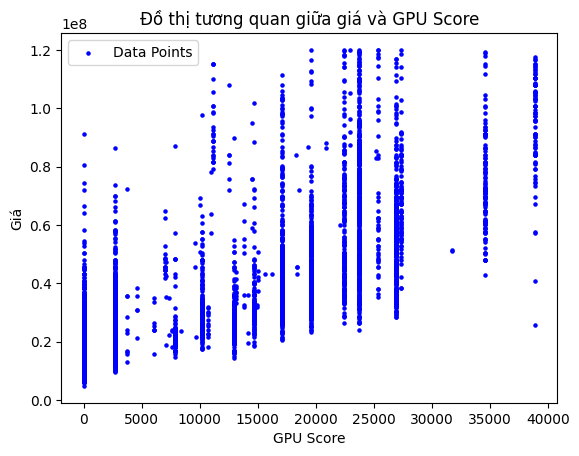

In [18]:
# Assuming df is your DataFrame
col1 = train_df['GPU Score']  # Replace 'Column1' with the actual name of your first column
col2 = train_df['Price']  # Replace 'Column2' with the actual name of your second column

# Plot scatter plot
plt.scatter(col1, col2, marker='o', color='blue', label='Data Points', s = 5)

# Add labels and title
plt.xlabel('GPU Score')
plt.ylabel('Giá')
plt.title('Đồ thị tương quan giữa giá và GPU Score')

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()

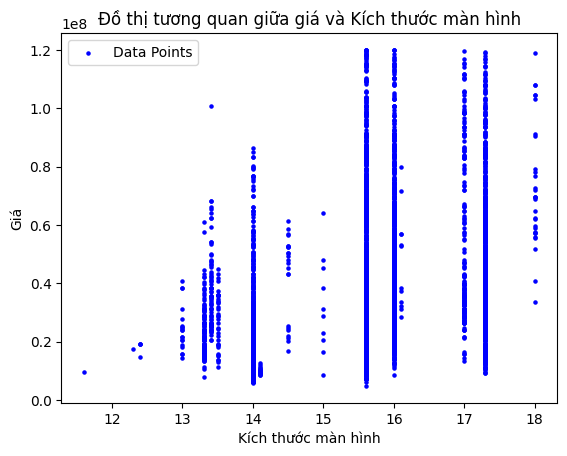

In [35]:
# Assuming df is your DataFrame
col1 = train_df['Size (length x width x height)']  # Replace 'Column1' with the actual name of your first column
col2 = train_df['Price']  # Replace 'Column2' with the actual name of your second column

# Plot scatter plot
plt.scatter(col1, col2, marker='o', color='blue', label='Data Points', s = 5)

# Add labels and title
plt.xlabel('Thể tích máy')
plt.ylabel('Giá')
plt.title('Đồ thị tương quan giữa giá và thể tích máy')

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()

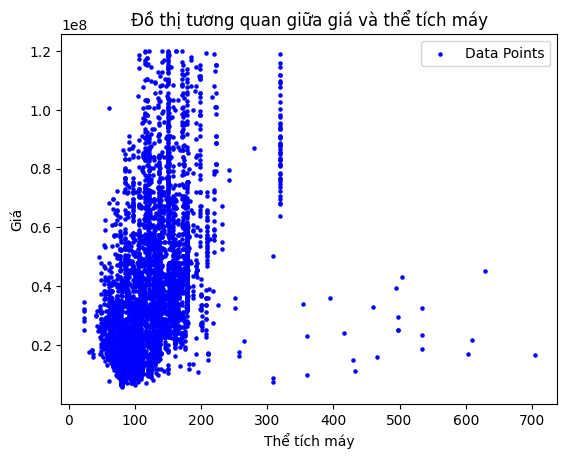

In [36]:
# Assuming df is your DataFrame
col1 = train_df['Size (length x width x height)']  # Replace 'Column1' with the actual name of your first column
col2 = train_df['Price']  # Replace 'Column2' with the actual name of your second column

# Plot scatter plot
plt.scatter(col1, col2, marker='o', color='blue', label='Data Points', s = 5)

# Add labels and title
plt.xlabel('Thể tích máy')
plt.ylabel('Giá')
plt.title('Đồ thị tương quan giữa giá và thể tích máy')

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()

In [124]:
def PriceDistribution(nameType, rangePrice):
    value = []
    o_df['Price'] = pd.to_numeric(o_df['Price'])
    nameX = []
    for i in range(0, rangePrice):
        filtered_data = new[(new["Price"] > i * 5000000) & (new["Price"] < (i + 1) * 5000000) & (new[nameType] != 0)]
        nameX.append(str(i * 5) + "-" + str((i + 1) * 5))
        value.append(filtered_data["Price"].value_counts())

    ax = pd.concat(value, axis=1).T.plot(kind='bar', stacked=True, color='b', legend=False)

    plt.title(f'Giá {nameType}')
    plt.xlabel('Giá')
    plt.ylabel('Số lượng')
    ax.set_xticklabels(nameX, rotation=45, ha='right')
    plt.show()

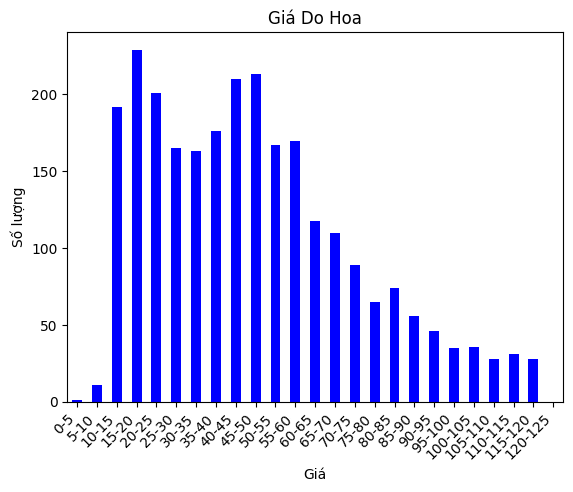

In [131]:
PriceDistribution("Do Hoa", 25)

Game

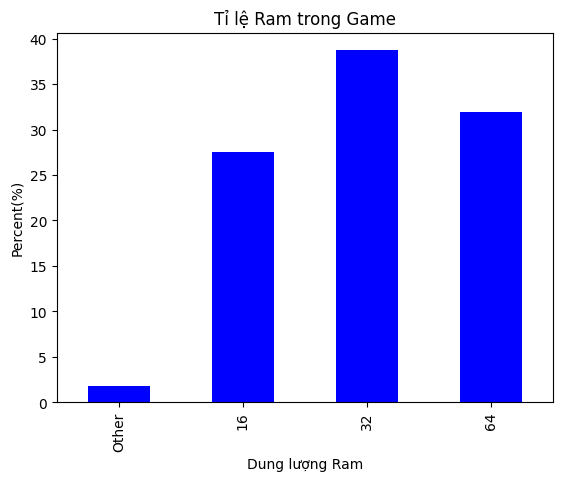

In [19]:
RamDistribution("Game", 15)

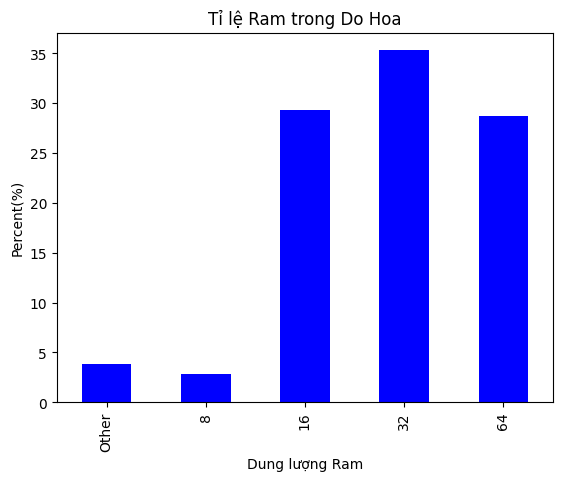

In [20]:
RamDistribution("Do Hoa", 50)

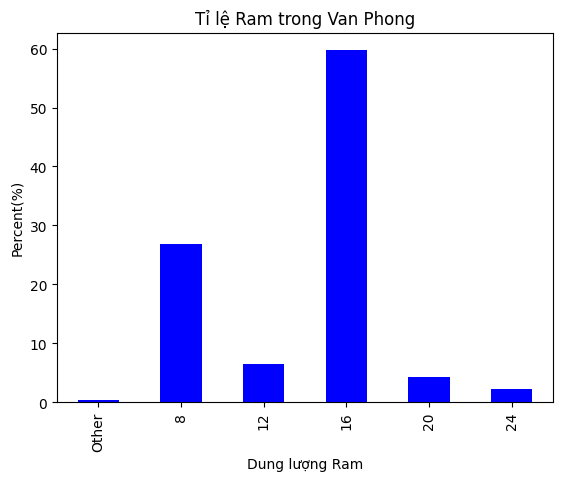

In [21]:
RamDistribution("Van Phong", 50)

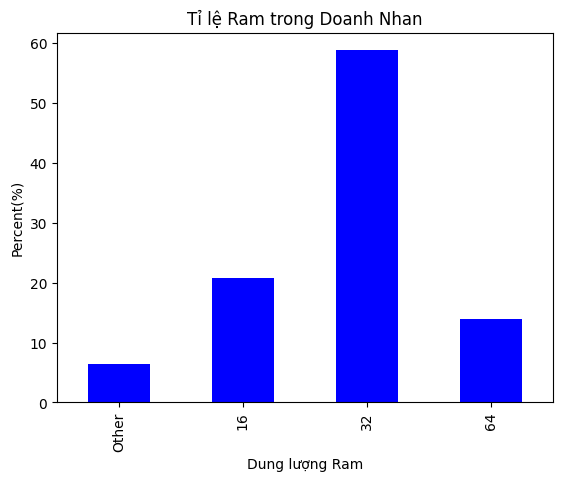

In [22]:
RamDistribution("Doanh Nhan", 10)

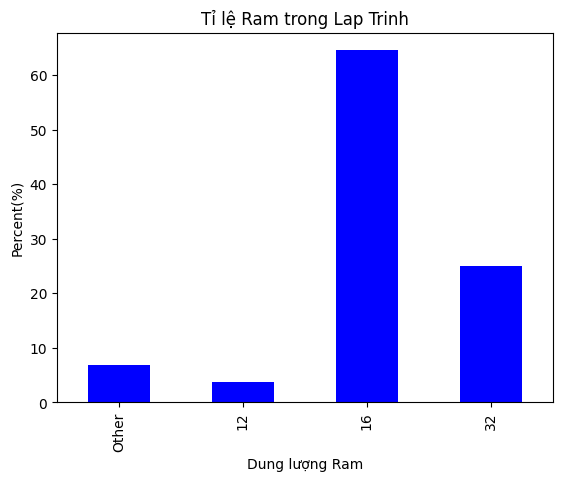

In [23]:
RamDistribution("Lap Trinh", 60)

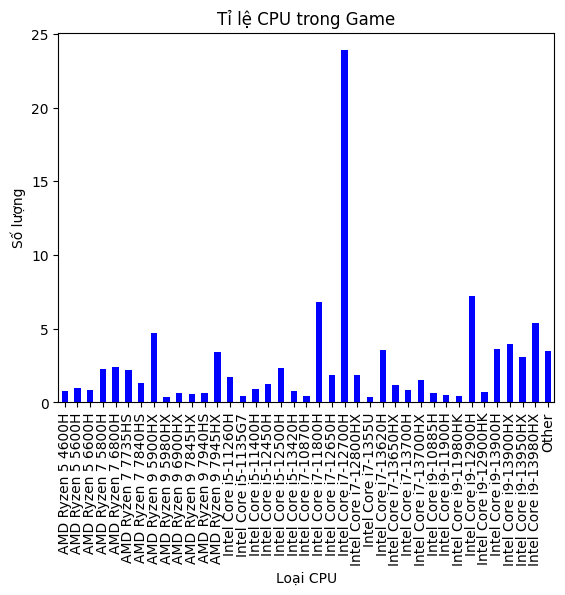

In [24]:
CPUDistribution("Game", 10)

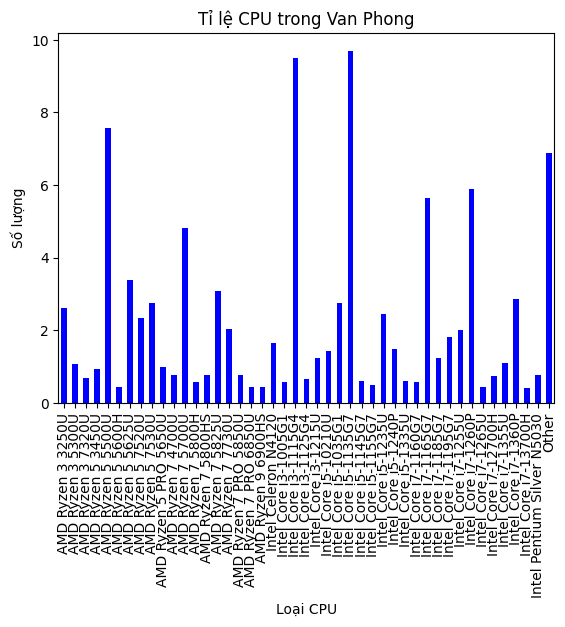

In [25]:
CPUDistribution("Van Phong", 10)

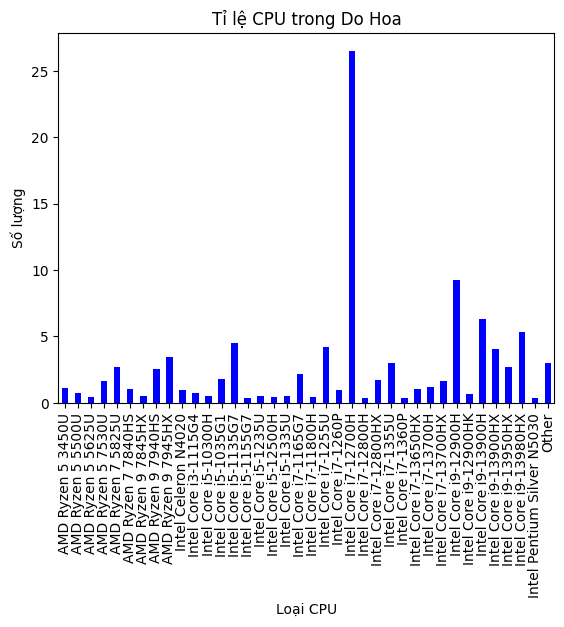

In [26]:
CPUDistribution("Do Hoa", 10)

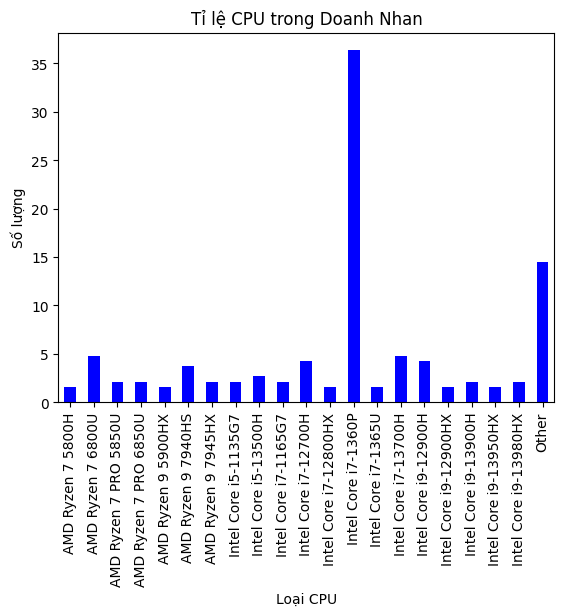

In [27]:
CPUDistribution("Doanh Nhan", 3)

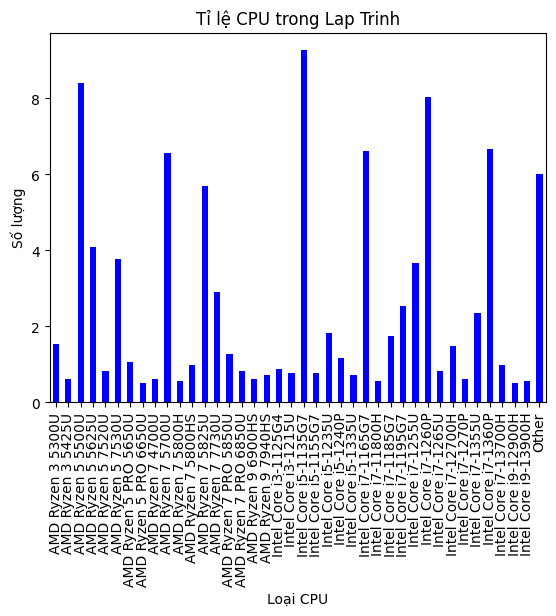

In [28]:
CPUDistribution("Lap Trinh", 10)

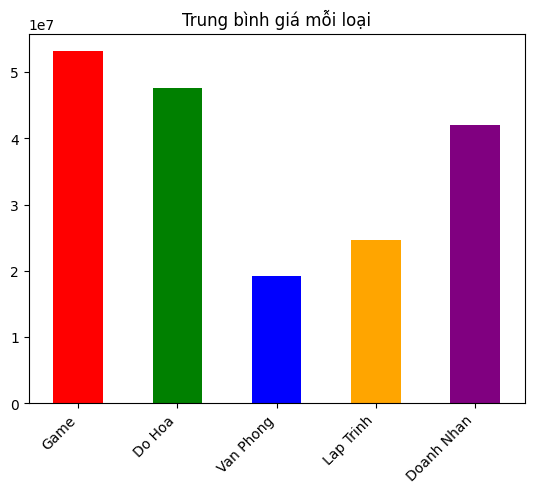

In [29]:
# List of colors for each category
colors = ['red', 'green', 'blue', 'orange', 'purple']
priceEachType = [(AveragePrice("Game")), AveragePrice("Do Hoa"), AveragePrice("Van Phong"), AveragePrice("Lap Trinh"), AveragePrice("Doanh Nhan")]

ax = pd.Series(priceEachType).plot(kind='bar', color=colors)
ax.set_xticklabels(("Game", "Do Hoa", "Van Phong", "Lap Trinh", "Doanh Nhan"), rotation=45, ha='right')
plt.title('Trung bình giá mỗi loại')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

In [30]:
def RamDistributionAll(thressHold):
    df.loc[df["Memory (RAM)"] == "0biet", "Memory (RAM)"] = 0
    value_counts = df["Memory (RAM)"].value_counts()

    # Plot a pie chart

    combined_counts = value_counts[value_counts >= thressHold]
    combined_counts['1'] = value_counts[value_counts < thressHold].sum()

    combined_counts.index = combined_counts.index.astype(int)
    
    total = combined_counts.sum()
    combined_counts_percent = (combined_counts / total) * 100

    # Sort the values before plotting
    combined_counts_percent = combined_counts_percent.sort_index()

    # Plot a bar chart
    ax = combined_counts_percent.plot(kind='bar', color='b')

    plt.title(f'Tỉ lệ Ram')
    plt.xlabel('Dung lượng Ram')
    plt.ylabel('Percent(%)')

    new_labels = list(combined_counts_percent.index)
    new_labels[0] = 'Other'  # Replace 'New Label' with your desired label for the first tick
    ax.set_xticklabels(new_labels)

    plt.show()

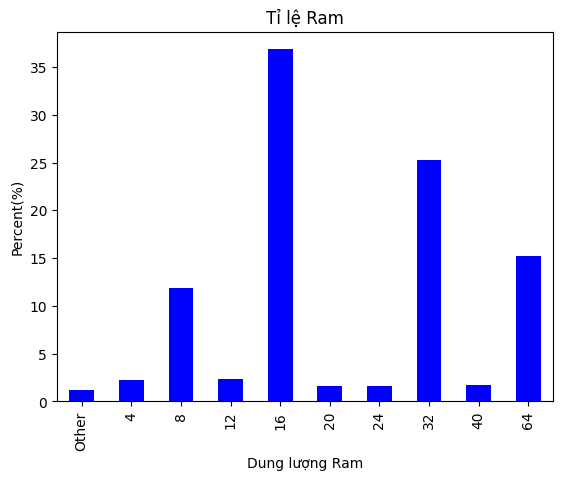

In [31]:
RamDistributionAll(100)

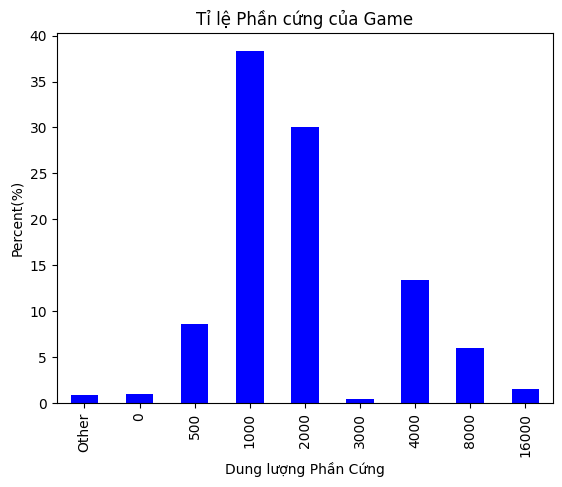

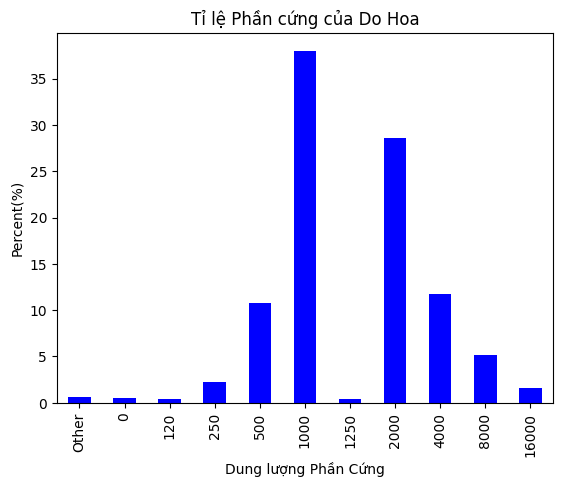

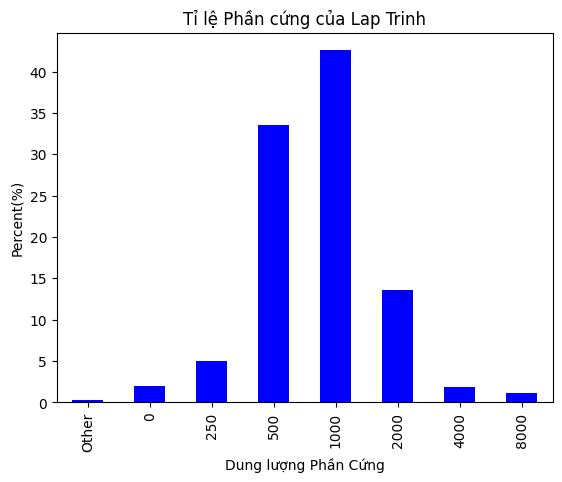

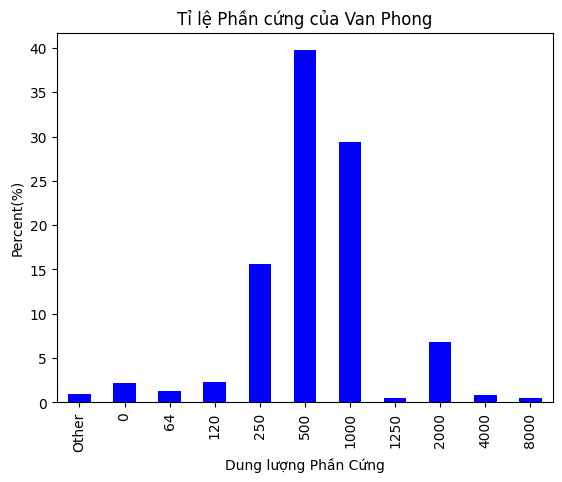

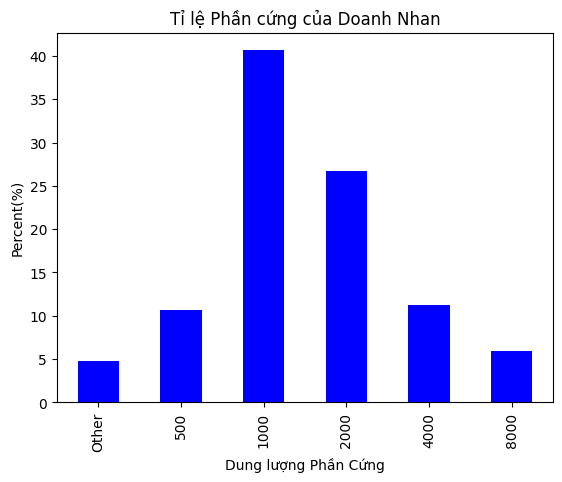

In [32]:
HardDriveDistribution("Game", 10)
HardDriveDistribution("Do Hoa", 10)
HardDriveDistribution("Lap Trinh", 10)
HardDriveDistribution("Van Phong", 10)
HardDriveDistribution("Doanh Nhan", 10)

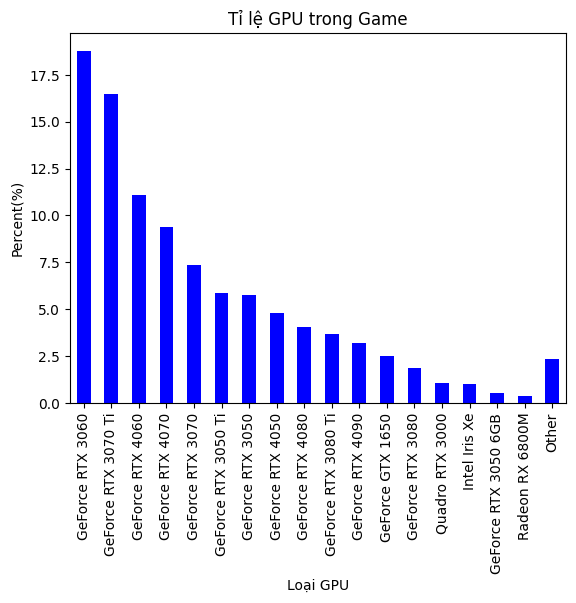

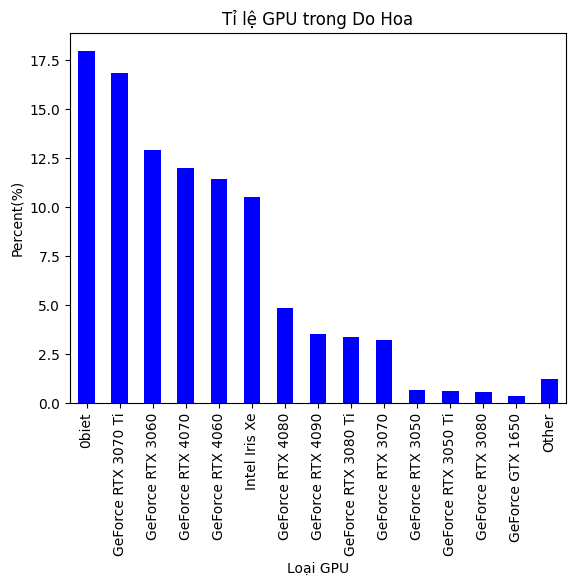

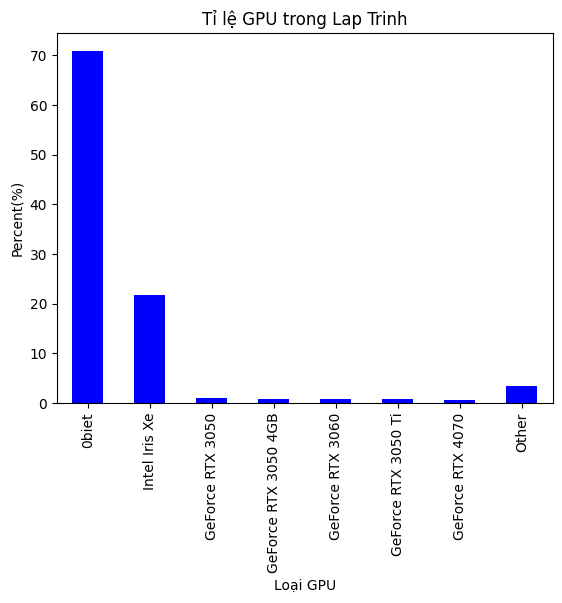

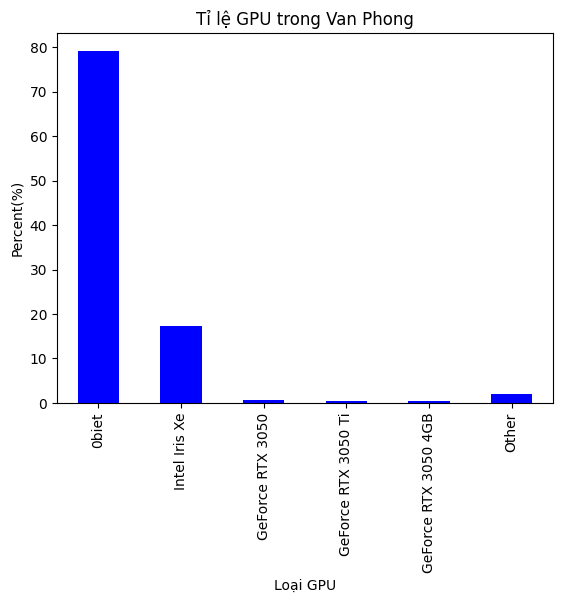

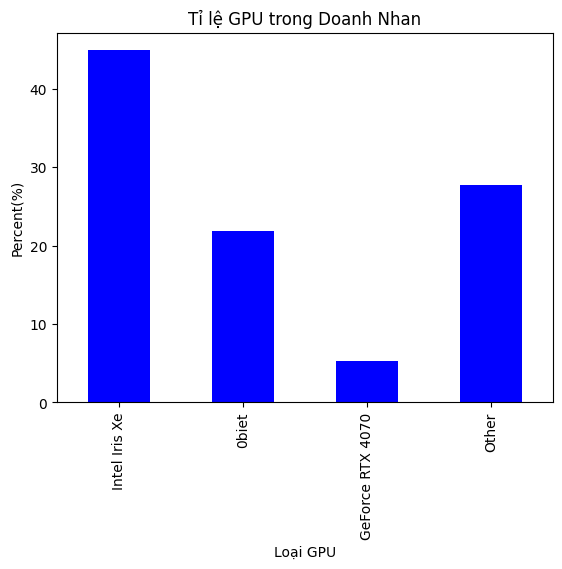

In [41]:
GPUDistribution("Game", 10)
GPUDistribution("Do Hoa", 10)
GPUDistribution("Lap Trinh", 10)
GPUDistribution("Van Phong", 10)
GPUDistribution("Doanh Nhan", 10)